# Student Rankings Analysis with Visualizations

This notebook provides comprehensive ranking analysis for students, including both age-adjusted and non-age-adjusted scores, with interactive visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Data Loading and Preprocessing

In [2]:
def load_and_preprocess_data(file_path):
    """
    Load and preprocess the student data from Excel file.
    """
    # Read the Excel file
    df = pd.read_excel(file_path, header=1)
    
    # Filter out absent students
    df_filtered = df[(df.iloc[:, 4] != 'absent') & (df.iloc[:, 5] != 'absent')].copy()
    
    # Convert candidate numbers to string
    df_filtered.iloc[:, 0] = df_filtered.iloc[:, 0].astype(str)
    
    # Rename columns for clarity
    df_filtered.columns = ['Candidate_Number', 'Gender', 'English_Percent', 'Maths_Percent', 
                          'English_Raw', 'Maths_Raw', 'Total_Raw', 
                          'English_AgeAdj', 'Maths_AgeAdj', 'Total_AgeAdj']
    
    return df_filtered

# Load data
file_path = 'data/2025_Test_A_hall-based_results_Excel.xlsx'
df = load_and_preprocess_data(file_path)

print(f"Data loaded successfully!")
print(f"Total students: {len(df)}")
print(f"Male students: {len(df[df['Gender'] == 'Male'])}")
print(f"Female students: {len(df[df['Gender'] == 'Female'])}")
print("\nFirst few rows:")
df.head()

Data loaded successfully!
Total students: 2118
Male students: 1155
Female students: 963

First few rows:


,Candidate_Number,Gender,English_Percent,Maths_Percent,English_Raw,Maths_Raw,Total_Raw,English_AgeAdj,Maths_AgeAdj,Total_AgeAdj
101,7003,Male,0.341772,0.022222,86.13,59.32,145.45,85.89,59.15,145.04
102,6136,Female,0.240506,0.044444,72.2,61.06,133.26,74.8,62.82,137.62
104,4011,Male,0.139241,0.088889,58.27,64.53,122.80,60.56,66.08,126.64
105,6137,Male,0.189873,0.088889,65.24,64.53,129.77,66.1,65.12,131.22
106,6078,Male,0.215190,0.088889,68.72,64.53,133.25,66.71,63.17,129.88


## 2. Ranking Function

In [3]:
def calculate_rank_comprehensive(df, candidate_number):
    """
    Calculate comprehensive rankings for a student.
    """
    candidate_number = str(candidate_number)
    
    # Separate boys and total students
    boys_df = df[df['Gender'] == 'Male'].copy()
    total_df = df.copy()
    
    # Calculate ranks for boys only - RAW SCORES
    boys_df['English_Rank_Boys_Raw'] = boys_df['English_Raw'].rank(ascending=False)
    boys_df['Maths_Rank_Boys_Raw'] = boys_df['Maths_Raw'].rank(ascending=False)
    boys_df['Total_Rank_Boys_Raw'] = boys_df['Total_Raw'].rank(ascending=False)
    
    # Calculate ranks for boys only - AGE-ADJUSTED
    boys_df['English_Rank_Boys_AgeAdj'] = boys_df['English_AgeAdj'].rank(ascending=False)
    boys_df['Maths_Rank_Boys_AgeAdj'] = boys_df['Maths_AgeAdj'].rank(ascending=False)
    boys_df['Total_Rank_Boys_AgeAdj'] = boys_df['Total_AgeAdj'].rank(ascending=False)
    
    # Calculate percentage ranks for boys - RAW
    total_boys = len(boys_df)
    boys_df['English_Percentile_Boys_Raw'] = ((total_boys - boys_df['English_Rank_Boys_Raw'] + 1) / total_boys * 100).round(2)
    boys_df['Maths_Percentile_Boys_Raw'] = ((total_boys - boys_df['Maths_Rank_Boys_Raw'] + 1) / total_boys * 100).round(2)
    boys_df['Total_Percentile_Boys_Raw'] = ((total_boys - boys_df['Total_Rank_Boys_Raw'] + 1) / total_boys * 100).round(2)
    
    # Calculate percentage ranks for boys - AGE-ADJUSTED
    boys_df['English_Percentile_Boys_AgeAdj'] = ((total_boys - boys_df['English_Rank_Boys_AgeAdj'] + 1) / total_boys * 100).round(2)
    boys_df['Maths_Percentile_Boys_AgeAdj'] = ((total_boys - boys_df['Maths_Rank_Boys_AgeAdj'] + 1) / total_boys * 100).round(2)
    boys_df['Total_Percentile_Boys_AgeAdj'] = ((total_boys - boys_df['Total_Rank_Boys_AgeAdj'] + 1) / total_boys * 100).round(2)
    
    # Calculate ranks for total students - RAW
    total_df['English_Rank_Total_Raw'] = total_df['English_Raw'].rank(ascending=False)
    total_df['Maths_Rank_Total_Raw'] = total_df['Maths_Raw'].rank(ascending=False)
    total_df['Total_Rank_Total_Raw'] = total_df['Total_Raw'].rank(ascending=False)
    
    # Calculate ranks for total students - AGE-ADJUSTED
    total_df['English_Rank_Total_AgeAdj'] = total_df['English_AgeAdj'].rank(ascending=False)
    total_df['Maths_Rank_Total_AgeAdj'] = total_df['Maths_AgeAdj'].rank(ascending=False)
    total_df['Total_Rank_Total_AgeAdj'] = total_df['Total_AgeAdj'].rank(ascending=False)
    
    # Calculate percentage ranks for total students - RAW
    total_students = len(total_df)
    total_df['English_Percentile_Total_Raw'] = ((total_students - total_df['English_Rank_Total_Raw'] + 1) / total_students * 100).round(2)
    total_df['Maths_Percentile_Total_Raw'] = ((total_students - total_df['Maths_Rank_Total_Raw'] + 1) / total_students * 100).round(2)
    total_df['Total_Percentile_Total_Raw'] = ((total_students - total_df['Total_Rank_Total_Raw'] + 1) / total_students * 100).round(2)
    
    # Calculate percentage ranks for total students - AGE-ADJUSTED
    total_df['English_Percentile_Total_AgeAdj'] = ((total_students - total_df['English_Rank_Total_AgeAdj'] + 1) / total_students * 100).round(2)
    total_df['Maths_Percentile_Total_AgeAdj'] = ((total_students - total_df['Maths_Rank_Total_AgeAdj'] + 1) / total_students * 100).round(2)
    total_df['Total_Percentile_Total_AgeAdj'] = ((total_students - total_df['Total_Rank_Total_AgeAdj'] + 1) / total_students * 100).round(2)
    
    # Find student data
    student_boys_data = boys_df[boys_df['Candidate_Number'] == candidate_number]
    student_total_data = total_df[total_df['Candidate_Number'] == candidate_number]
    
    if not student_total_data.empty:
        result = {}
        
        # Boys ranking (only if student is male)
        if not student_boys_data.empty:
            result.update({
                # Raw scores
                'English_Rank_Boys_Raw': int(student_boys_data['English_Rank_Boys_Raw'].iloc[0]),
                'Maths_Rank_Boys_Raw': int(student_boys_data['Maths_Rank_Boys_Raw'].iloc[0]),
                'Total_Rank_Boys_Raw': int(student_boys_data['Total_Rank_Boys_Raw'].iloc[0]),
                'English_Percentile_Boys_Raw': float(student_boys_data['English_Percentile_Boys_Raw'].iloc[0]),
                'Maths_Percentile_Boys_Raw': float(student_boys_data['Maths_Percentile_Boys_Raw'].iloc[0]),
                'Total_Percentile_Boys_Raw': float(student_boys_data['Total_Percentile_Boys_Raw'].iloc[0]),
                
                # Age-adjusted scores
                'English_Rank_Boys_AgeAdj': int(student_boys_data['English_Rank_Boys_AgeAdj'].iloc[0]),
                'Maths_Rank_Boys_AgeAdj': int(student_boys_data['Maths_Rank_Boys_AgeAdj'].iloc[0]),
                'Total_Rank_Boys_AgeAdj': int(student_boys_data['Total_Rank_Boys_AgeAdj'].iloc[0]),
                'English_Percentile_Boys_AgeAdj': float(student_boys_data['English_Percentile_Boys_AgeAdj'].iloc[0]),
                'Maths_Percentile_Boys_AgeAdj': float(student_boys_data['Maths_Percentile_Boys_AgeAdj'].iloc[0]),
                'Total_Percentile_Boys_AgeAdj': float(student_boys_data['Total_Percentile_Boys_AgeAdj'].iloc[0]),
                
                'Total_Boys': int(total_boys)
            })
        else:
            result.update({
                'English_Rank_Boys_Raw': None, 'Maths_Rank_Boys_Raw': None, 'Total_Rank_Boys_Raw': None,
                'English_Percentile_Boys_Raw': None, 'Maths_Percentile_Boys_Raw': None, 'Total_Percentile_Boys_Raw': None,
                'English_Rank_Boys_AgeAdj': None, 'Maths_Rank_Boys_AgeAdj': None, 'Total_Rank_Boys_AgeAdj': None,
                'English_Percentile_Boys_AgeAdj': None, 'Maths_Percentile_Boys_AgeAdj': None, 'Total_Percentile_Boys_AgeAdj': None,
                'Total_Boys': int(total_boys)
            })
        
        # Total ranking
        result.update({
            # Raw scores
            'English_Rank_Total_Raw': int(student_total_data['English_Rank_Total_Raw'].iloc[0]),
            'Maths_Rank_Total_Raw': int(student_total_data['Maths_Rank_Total_Raw'].iloc[0]),
            'Total_Rank_Total_Raw': int(student_total_data['Total_Rank_Total_Raw'].iloc[0]),
            'English_Percentile_Total_Raw': float(student_total_data['English_Percentile_Total_Raw'].iloc[0]),
            'Maths_Percentile_Total_Raw': float(student_total_data['Maths_Percentile_Total_Raw'].iloc[0]),
            'Total_Percentile_Total_Raw': float(student_total_data['Total_Percentile_Total_Raw'].iloc[0]),
            
            # Age-adjusted scores
            'English_Rank_Total_AgeAdj': int(student_total_data['English_Rank_Total_AgeAdj'].iloc[0]),
            'Maths_Rank_Total_AgeAdj': int(student_total_data['Maths_Rank_Total_AgeAdj'].iloc[0]),
            'Total_Rank_Total_AgeAdj': int(student_total_data['Total_Rank_Total_AgeAdj'].iloc[0]),
            'English_Percentile_Total_AgeAdj': float(student_total_data['English_Percentile_Total_AgeAdj'].iloc[0]),
            'Maths_Percentile_Total_AgeAdj': float(student_total_data['Maths_Percentile_Total_AgeAdj'].iloc[0]),
            'Total_Percentile_Total_AgeAdj': float(student_total_data['Total_Percentile_Total_AgeAdj'].iloc[0]),
            
            'Total_Students': int(total_students)
        })
        
        return result
    else:
        return None

## 3. Visualization Functions

In [4]:
def create_ranking_comparison_chart(result, candidate_number):
    """
    Create a comparison chart showing raw vs age-adjusted rankings.
    """
    if not result:
        print(f"No data found for candidate {candidate_number}")
        return
    
    # Prepare data for visualization
    subjects = ['English', 'Maths', 'Total']
    
    # Raw scores data
    raw_boys = [result.get('English_Percentile_Boys_Raw'), 
                result.get('Maths_Percentile_Boys_Raw'), 
                result.get('Total_Percentile_Boys_Raw')]
    raw_total = [result.get('English_Percentile_Total_Raw'), 
                 result.get('Maths_Percentile_Total_Raw'), 
                 result.get('Total_Percentile_Total_Raw')]
    
    # Age-adjusted scores data
    ageadj_boys = [result.get('English_Percentile_Boys_AgeAdj'), 
                   result.get('Maths_Percentile_Boys_AgeAdj'), 
                   result.get('Total_Percentile_Boys_AgeAdj')]
    ageadj_total = [result.get('English_Percentile_Total_AgeAdj'), 
                    result.get('Maths_Percentile_Total_AgeAdj'), 
                    result.get('Total_Percentile_Total_AgeAdj')]
    
    # Create the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    x = np.arange(len(subjects))
    width = 0.35
    
    # Boys ranking comparison
    if any(x is not None for x in raw_boys):
        bars1 = ax1.bar(x - width/2, [x if x is not None else 0 for x in raw_boys], 
                        width, label='Raw Scores', alpha=0.8, color='skyblue')
        bars2 = ax1.bar(x + width/2, [x if x is not None else 0 for x in ageadj_boys], 
                        width, label='Age-Adjusted Scores', alpha=0.8, color='lightcoral')
        
        ax1.set_xlabel('Subjects')
        ax1.set_ylabel('Percentile Rank (%)')
        ax1.set_title(f'Boys Ranking Comparison - Candidate {candidate_number}')
        ax1.set_xticks(x)
        ax1.set_xticklabels(subjects)
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.1f}%', ha='center', va='bottom')
        
        for bar in bars2:
            height = bar.get_height()
            if height > 0:
                ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
                        f'{height:.1f}%', ha='center', va='bottom')
    else:
        ax1.text(0.5, 0.5, 'Student is not male\nNo boys ranking available', 
                ha='center', va='center', transform=ax1.transAxes, fontsize=12)
        ax1.set_title(f'Boys Ranking - Candidate {candidate_number}')
    
    # Total ranking comparison
    bars3 = ax2.bar(x - width/2, raw_total, width, label='Raw Scores', alpha=0.8, color='skyblue')
    bars4 = ax2.bar(x + width/2, ageadj_total, width, label='Age-Adjusted Scores', alpha=0.8, color='lightcoral')
    
    ax2.set_xlabel('Subjects')
    ax2.set_ylabel('Percentile Rank (%)')
    ax2.set_title(f'Total Ranking Comparison - Candidate {candidate_number}')
    ax2.set_xticks(x)
    ax2.set_xticklabels(subjects)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar in bars3:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    for bar in bars4:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

def create_performance_radar_chart(result, candidate_number):
    """
    Create a radar chart showing performance across different metrics.
    """
    if not result:
        print(f"No data found for candidate {candidate_number}")
        return
    
    # Categories for radar chart
    categories = ['English (Raw)', 'Maths (Raw)', 'Total (Raw)', 
                 'English (AgeAdj)', 'Maths (AgeAdj)', 'Total (AgeAdj)']
    
    # Values (percentile ranks)
    values = [
        result.get('English_Percentile_Total_Raw', 0),
        result.get('Maths_Percentile_Total_Raw', 0),
        result.get('Total_Percentile_Total_Raw', 0),
        result.get('English_Percentile_Total_AgeAdj', 0),
        result.get('Maths_Percentile_Total_AgeAdj', 0),
        result.get('Total_Percentile_Total_AgeAdj', 0)
    ]
    
    # Number of variables
    N = len(categories)
    
    # Compute angle for each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    # Add the first value to complete the circle
    values += values[:1]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Plot the data
    ax.plot(angles, values, 'o-', linewidth=2, label='Performance')
    ax.fill(angles, values, alpha=0.25)
    
    # Set the labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Set the y-axis limits
    ax.set_ylim(0, 100)
    
    # Add title
    plt.title(f'Performance Radar Chart - Candidate {candidate_number}', size=15, y=1.1)
    
    plt.show()

def create_ranking_summary_table(result, candidate_number):
    """
    Create a summary table of all rankings.
    """
    if not result:
        print(f"No data found for candidate {candidate_number}")
        return
    
    # Create summary data
    summary_data = {
        'Metric': [
            'English Rank (Boys - Raw)', 'Maths Rank (Boys - Raw)', 'Total Rank (Boys - Raw)',
            'English Rank (Boys - AgeAdj)', 'Maths Rank (Boys - AgeAdj)', 'Total Rank (Boys - AgeAdj)',
            'English Rank (Total - Raw)', 'Maths Rank (Total - Raw)', 'Total Rank (Total - Raw)',
            'English Rank (Total - AgeAdj)', 'Maths Rank (Total - AgeAdj)', 'Total Rank (Total - AgeAdj)'
        ],
        'Rank': [
            result.get('English_Rank_Boys_Raw'), result.get('Maths_Rank_Boys_Raw'), result.get('Total_Rank_Boys_Raw'),
            result.get('English_Rank_Boys_AgeAdj'), result.get('Maths_Rank_Boys_AgeAdj'), result.get('Total_Rank_Boys_AgeAdj'),
            result.get('English_Rank_Total_Raw'), result.get('Maths_Rank_Total_Raw'), result.get('Total_Rank_Total_Raw'),
            result.get('English_Rank_Total_AgeAdj'), result.get('Maths_Rank_Total_AgeAdj'), result.get('Total_Rank_Total_AgeAdj')
        ],
        'Percentile': [
            result.get('English_Percentile_Boys_Raw'), result.get('Maths_Percentile_Boys_Raw'), result.get('Total_Percentile_Boys_Raw'),
            result.get('English_Percentile_Boys_AgeAdj'), result.get('Maths_Percentile_Boys_AgeAdj'), result.get('Total_Percentile_Boys_AgeAdj'),
            result.get('English_Percentile_Total_Raw'), result.get('Maths_Percentile_Total_Raw'), result.get('Total_Percentile_Total_Raw'),
            result.get('English_Percentile_Total_AgeAdj'), result.get('Maths_Percentile_Total_AgeAdj'), result.get('Total_Percentile_Total_AgeAdj')
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    # Display the table
    print(f"\nRanking Summary for Candidate {candidate_number}")
    print("=" * 80)
    print(summary_df.to_string(index=False))
    
    return summary_df

## 4. Interactive Analysis

Analysis for Candidate 7003


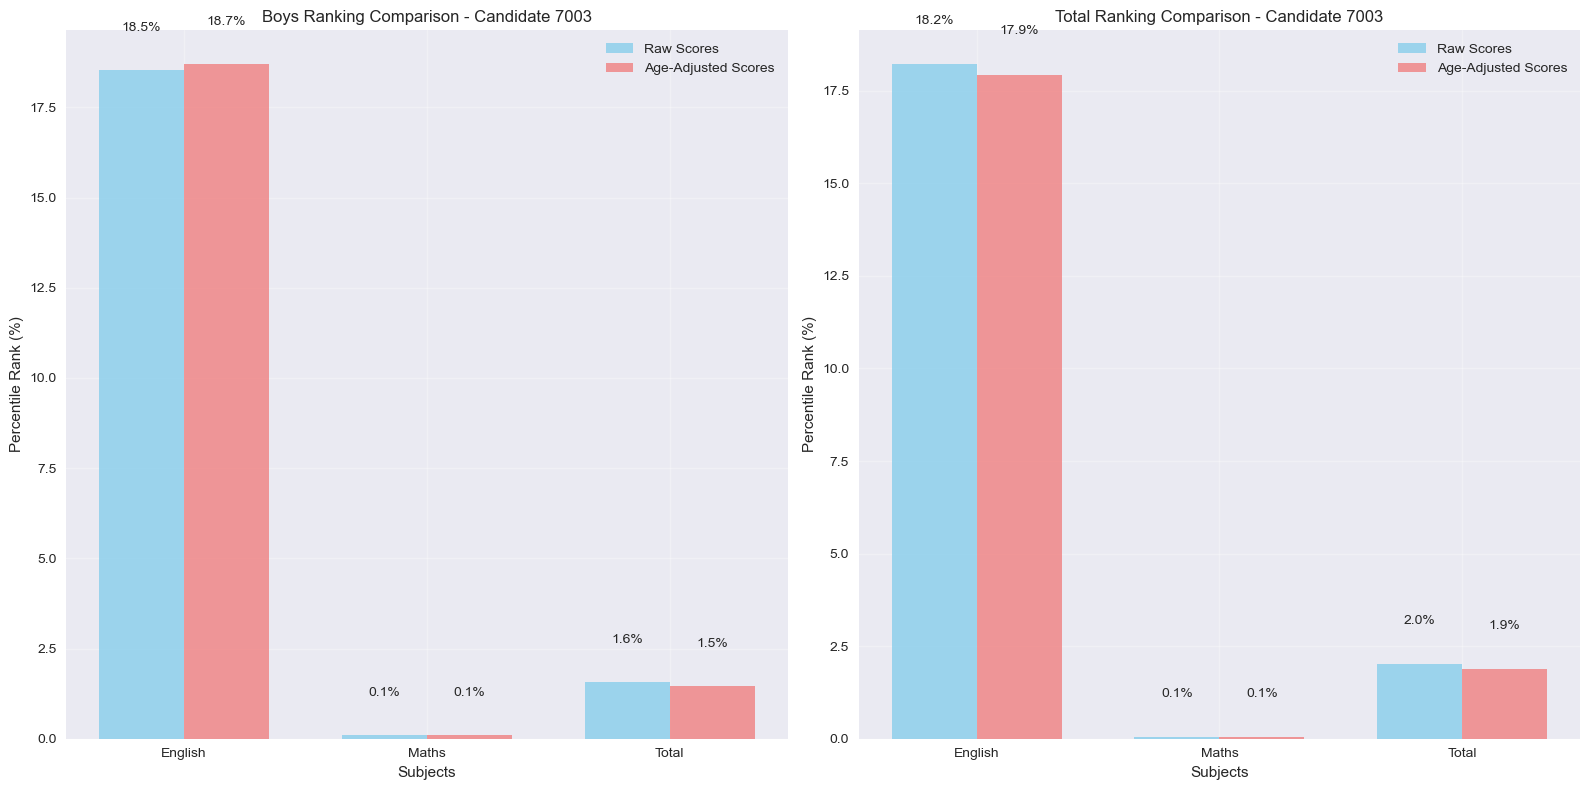

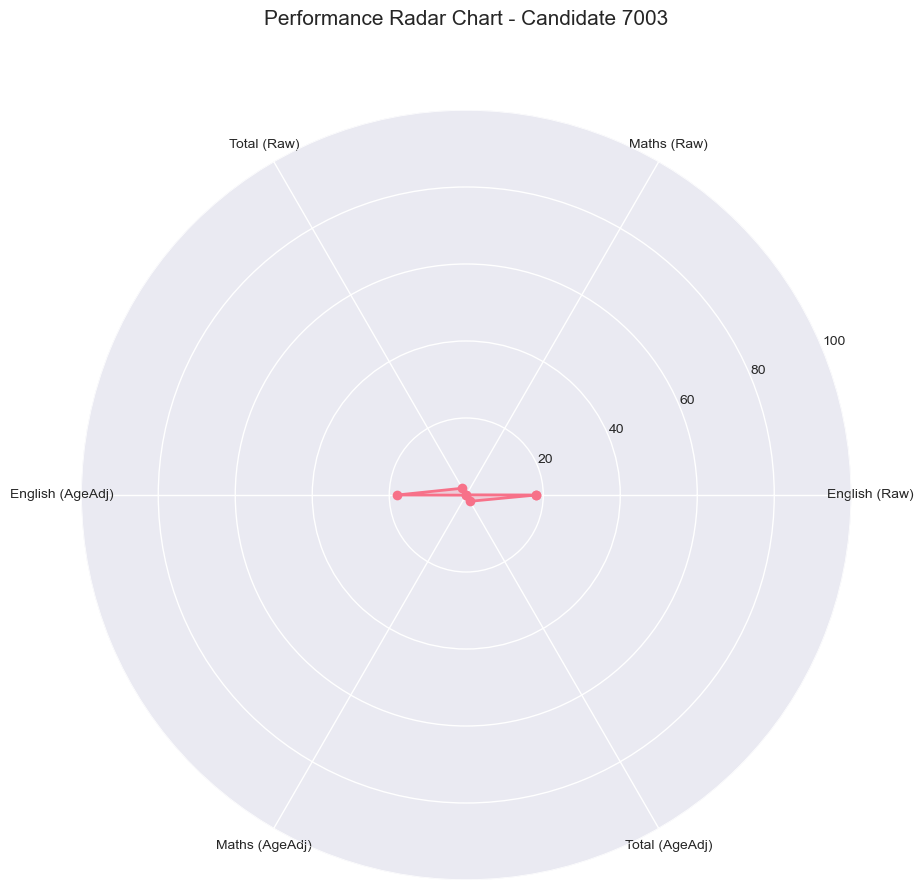


Ranking Summary for Candidate 7003
                       Metric  Rank  Percentile
    English Rank (Boys - Raw)   942       18.53
      Maths Rank (Boys - Raw)  1155        0.09
      Total Rank (Boys - Raw)  1138        1.56
 English Rank (Boys - AgeAdj)   940       18.70
   Maths Rank (Boys - AgeAdj)  1155        0.09
   Total Rank (Boys - AgeAdj)  1139        1.47
   English Rank (Total - Raw)  1733       18.22
     Maths Rank (Total - Raw)  2118        0.05
     Total Rank (Total - Raw)  2076        2.03
English Rank (Total - AgeAdj)  1739       17.94
  Maths Rank (Total - AgeAdj)  2118        0.05
  Total Rank (Total - AgeAdj)  2079        1.89


In [5]:
# Test with a specific candidate
candidate_number = 7003
result = calculate_rank_comprehensive(df, candidate_number)

if result:
    print(f"Analysis for Candidate {candidate_number}")
    print("=" * 50)
    
    # Create visualizations
    create_ranking_comparison_chart(result, candidate_number)
    create_performance_radar_chart(result, candidate_number)
    create_ranking_summary_table(result, candidate_number)
else:
    print(f"Candidate {candidate_number} not found in the data.")

## 5. Multiple Student Comparison

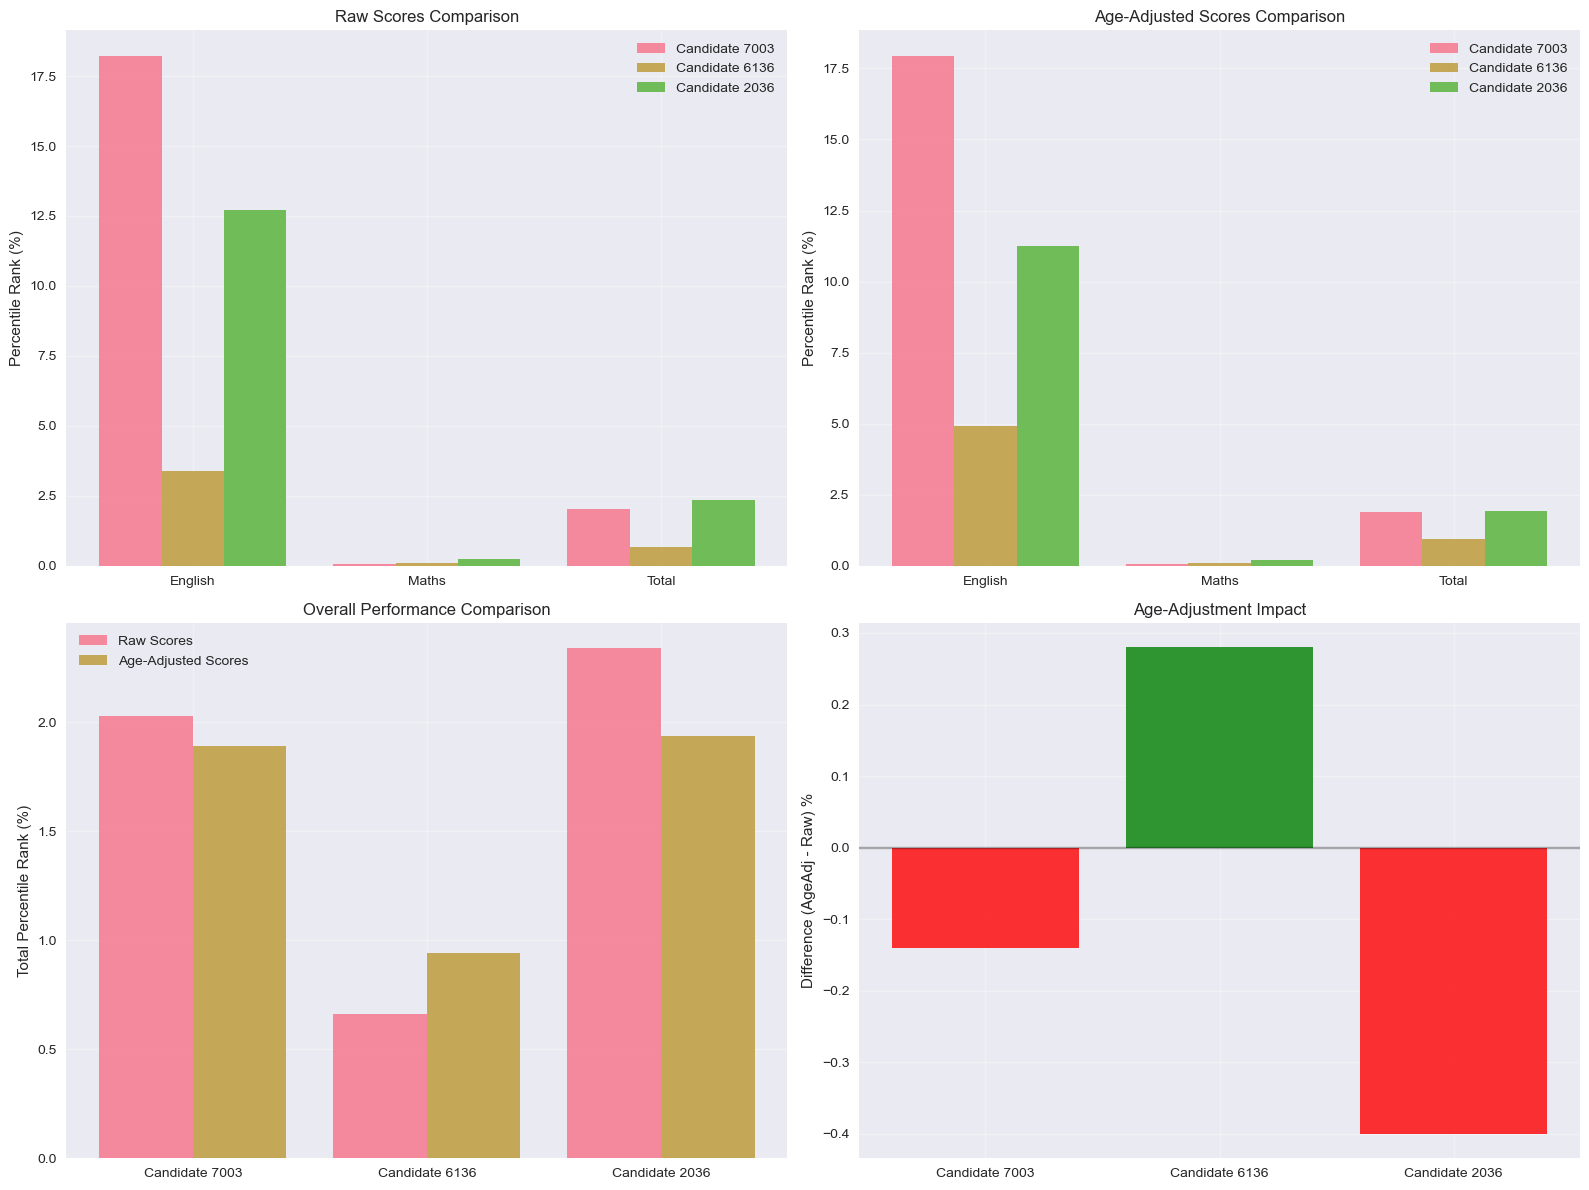

In [6]:
def compare_multiple_students(df, candidate_numbers):
    """
    Compare multiple students' performance.
    """
    results = {}
    
    for candidate in candidate_numbers:
        result = calculate_rank_comprehensive(df, candidate)
        if result:
            results[candidate] = result
    
    # Create comparison chart
    if results:
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        
        subjects = ['English', 'Maths', 'Total']
        x = np.arange(len(subjects))
        width = 0.8 / len(results)
        
        # Raw scores comparison
        for i, (candidate, result) in enumerate(results.items()):
            values = [result.get('English_Percentile_Total_Raw', 0),
                     result.get('Maths_Percentile_Total_Raw', 0),
                     result.get('Total_Percentile_Total_Raw', 0)]
            
            axes[0, 0].bar(x + i * width, values, width, label=f'Candidate {candidate}', alpha=0.8)
        
        axes[0, 0].set_title('Raw Scores Comparison')
        axes[0, 0].set_ylabel('Percentile Rank (%)')
        axes[0, 0].set_xticks(x + width * (len(results) - 1) / 2)
        axes[0, 0].set_xticklabels(subjects)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Age-adjusted scores comparison
        for i, (candidate, result) in enumerate(results.items()):
            values = [result.get('English_Percentile_Total_AgeAdj', 0),
                     result.get('Maths_Percentile_Total_AgeAdj', 0),
                     result.get('Total_Percentile_Total_AgeAdj', 0)]
            
            axes[0, 1].bar(x + i * width, values, width, label=f'Candidate {candidate}', alpha=0.8)
        
        axes[0, 1].set_title('Age-Adjusted Scores Comparison')
        axes[0, 1].set_ylabel('Percentile Rank (%)')
        axes[0, 1].set_xticks(x + width * (len(results) - 1) / 2)
        axes[0, 1].set_xticklabels(subjects)
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Overall performance comparison
        candidates = list(results.keys())
        overall_raw = [results[c]['Total_Percentile_Total_Raw'] for c in candidates]
        overall_ageadj = [results[c]['Total_Percentile_Total_AgeAdj'] for c in candidates]
        
        x_pos = np.arange(len(candidates))
        axes[1, 0].bar(x_pos - 0.2, overall_raw, 0.4, label='Raw Scores', alpha=0.8)
        axes[1, 0].bar(x_pos + 0.2, overall_ageadj, 0.4, label='Age-Adjusted Scores', alpha=0.8)
        
        axes[1, 0].set_title('Overall Performance Comparison')
        axes[1, 0].set_ylabel('Total Percentile Rank (%)')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels([f'Candidate {c}' for c in candidates])
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Performance difference
        differences = [overall_ageadj[i] - overall_raw[i] for i in range(len(overall_raw))]
        colors = ['green' if d > 0 else 'red' for d in differences]
        
        axes[1, 1].bar(x_pos, differences, color=colors, alpha=0.8)
        axes[1, 1].set_title('Age-Adjustment Impact')
        axes[1, 1].set_ylabel('Difference (AgeAdj - Raw) %')
        axes[1, 1].set_xticks(x_pos)
        axes[1, 1].set_xticklabels([f'Candidate {c}' for c in candidates])
        axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    return results

# Compare multiple students
candidates_to_compare = [7003, 6136, 2036]
comparison_results = compare_multiple_students(df, candidates_to_compare)

## 6. Data Distribution Analysis

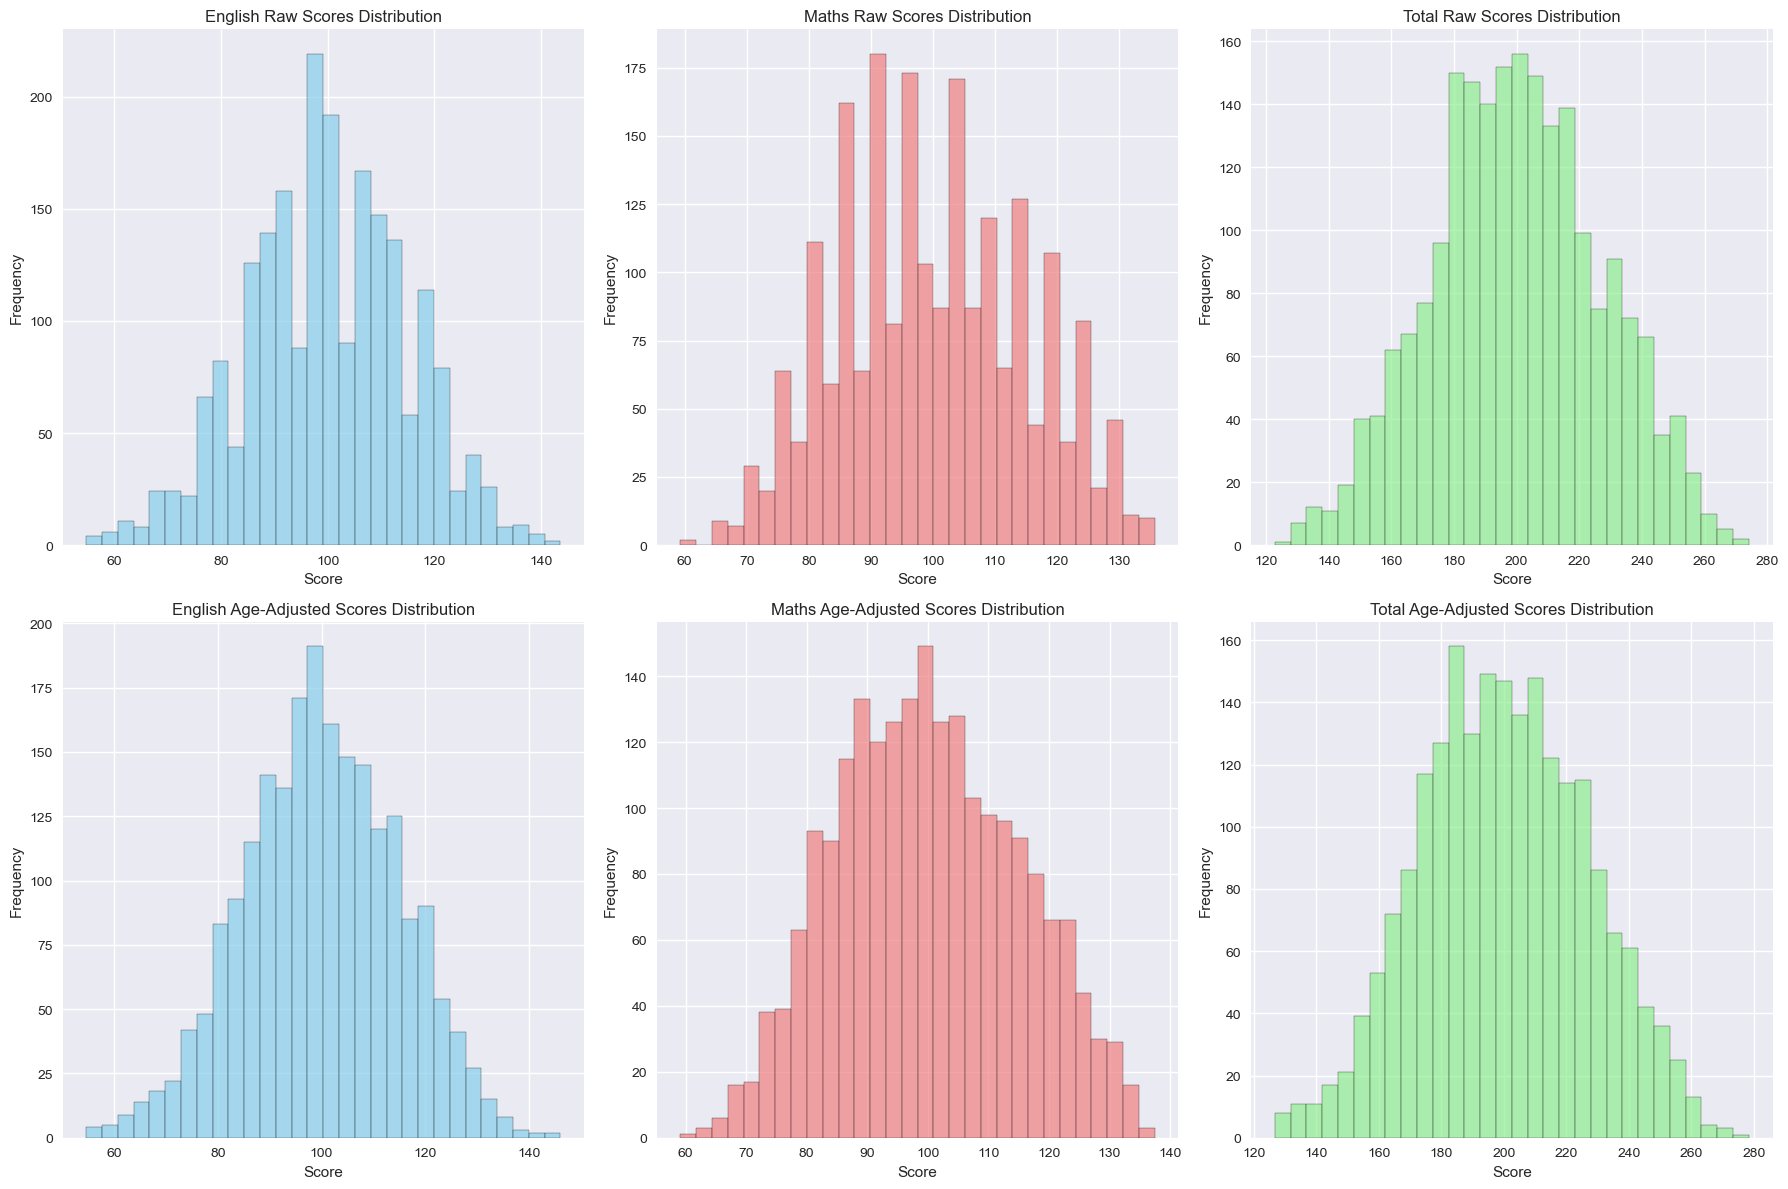


Score Distribution Summary:
         Total_Raw  Total_AgeAdj
count  2118.000000   2118.000000
mean    200.030892    200.031700
std      26.939562     26.777072
min     122.800000    126.640000
25%     180.220000    181.025000
50%     199.340000    199.750000
75%     218.470000    219.117500
max     274.130000    278.360000


In [7]:
def analyze_score_distributions(df):
    """
    Analyze the distribution of scores across the dataset.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # Raw scores distributions
    axes[0, 0].hist(df['English_Raw'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('English Raw Scores Distribution')
    axes[0, 0].set_xlabel('Score')
    axes[0, 0].set_ylabel('Frequency')
    
    axes[0, 1].hist(df['Maths_Raw'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Maths Raw Scores Distribution')
    axes[0, 1].set_xlabel('Score')
    axes[0, 1].set_ylabel('Frequency')
    
    axes[0, 2].hist(df['Total_Raw'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Total Raw Scores Distribution')
    axes[0, 2].set_xlabel('Score')
    axes[0, 2].set_ylabel('Frequency')
    
    # Age-adjusted scores distributions
    axes[1, 0].hist(df['English_AgeAdj'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[1, 0].set_title('English Age-Adjusted Scores Distribution')
    axes[1, 0].set_xlabel('Score')
    axes[1, 0].set_ylabel('Frequency')
    
    axes[1, 1].hist(df['Maths_AgeAdj'], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
    axes[1, 1].set_title('Maths Age-Adjusted Scores Distribution')
    axes[1, 1].set_xlabel('Score')
    axes[1, 1].set_ylabel('Frequency')
    
    axes[1, 2].hist(df['Total_AgeAdj'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 2].set_title('Total Age-Adjusted Scores Distribution')
    axes[1, 2].set_xlabel('Score')
    axes[1, 2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nScore Distribution Summary:")
    print("=" * 50)
    
    summary_stats = df[['English_Raw', 'Maths_Raw', 'Total_Raw', 
                       'English_AgeAdj', 'Maths_AgeAdj', 'Total_AgeAdj']].describe()
    print(summary_stats)

# Analyze distributions
analyze_score_distributions(df)